# Is Fandango Worth Trusting?

Movies are an enjoyment of all communities across the world, yet when it comes down to picking which one to see this weekend, our views may be slightly skewed by improper rating systems. 

In 2015, investigative journalism by Walt Hickey at common data journalistic site, 538. In this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/), he detailed a starring system of Fandango's that reported movies to be rounded up to the next highest rating, to elicit a bigger draw for movies they sold tickets for. 

In this project, I will be analyzing whether or not this article had an effect on Fandango's system. In 2015, Hickey found there were to be no movies with lower than a 2-star rating on Fandango, maybe it's changed? **Let's find out.**

In [1]:
# Loading relevant packages to analyze/visualize data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Hickey's Data
Hickey made his data publicly available on Github, so we can compare our results to his.

In [2]:
hickey_data = pd.read_csv('fandango_score_comparison.csv')
print(hickey_data.head())
print(hickey_data.shape)

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

Looks like his data had 146 rows, each representing a movie, and 22 characterizing columns

## Post-Article Data
Now we will load the data from 2016-2017, a year after Hickey's article hit the internet.

In [3]:
post_article = pd.read_csv('movie_ratings_16_17.csv')
print(post_article.head())
print(post_article.shape)

                     movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2 

Post-article dataset has fewer columns, but a little more than 50 rows of Movies to look at. 

## Isolating variables

Looking at Hickey's data, we want to look at specifically these columns:
- FILM: Movie Title
- Fandango_Stars: Number of Stars on Fandango
- Fandango_Ratingvalue: Rating Value, the 'actual' one.
- Fandango_votes: Number of votes for this film
- Fandango_Difference: Difference between presented stars and actual

With our newer dataset, right now let's look at these three columns:
- movie: Title of movie
- year: Year of release
- fandango: Fandango rating on website

In [4]:
hickey_data = hickey_data[['FILM','Fandango_Stars','Fandango_Ratingvalue',
                                  'Fandango_votes','Fandango_Difference']].copy()
post_article = post_article[['movie','year','fandango']].copy()
# Use .copy to avoid copy warning later on

The goal is to identify any change in the rating system of Fandango before and after the article was published. These two datasets should accomplish this.

To follow his evidence, we need to sample how he sampled and make sure our population is appropriately represented within the data we analyze.

From Hickey's [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) and his [README](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) of his analysis, we can tell two things:
- The movie had to have at least 30 fan ratings on Fandango's website at the time of sampling (2015).
- The movie must have had tickets on sale in 2015.

This means at least that the sampling was not random, he had qualities to search for and then restricted his sample from matching closely to the population of the dataset. 

Now looking at the dataset for after the article was published, in this [README](https://app.dataquest.io/c/53/m/288/guided-project%3A-investigating-fandango-movie-ratings/2/understanding-the-data), there are some qualities about the data collection:
- The movie must have been released in 2016 or later.
- The movie had to have a certain amount of votes/reviews to be collected.

This again shows selective sampling, which will not match the population efficiently and ultimately lead to sampling error. 

## Changing Courses

Knowing that the data isn't trustworthy to extrapolate results towards the full population we need to make it so. So, let's focus on identifying any changes within ratings for popular movies before the article, 2015, and after, 2016. 

## New Populations

With this goal in mind, we have two populations to seek out and sample:
- Ratings for popular movies from 2015.
- Ratings for popular movies from 2016.

The definition of 'popular' is subjective, so let's take it into our own hands and define it as any movie that has more than 30 ratings on Fandango.

To make sure this process will ensure a sampling pool indicative of the population, let's do some random sampling and see how many reviews these movies receive, just to see if the majority, >80%, have more than 30 reviews. 

In [5]:
sum(hickey_data['Fandango_votes'] < 30) 
# Counts number of rows that have less than 30 votes for the respective movie.

0

Hickey's data seems to be alright with all samples having more than 30 votes...

In [6]:
sample = post_article.sample(10, random_state = 1)
sample
#Use random_state = 1 we will always get this table,
#Using this implies we trust this sampling and didn't randomly sample for 
#a good looking table

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Since this dataset has no count, let's just manually look up how many votes each have on the internet. 

| Movie | Votes |
| --- | --- |
| Mechanic:Resurrection | 25,691 |
| Warcraft | 31,935 |
| Max Steel | 6,903 |
| Me Before You | 30,884 |
| Fantastic Beasts and Where to Find Them | 88,744 |
| Cell | 3,902 |
| Genius | 12 |
| Sully | 48,780 |
| A Hologram for the King | 10,279 |
| Captain America: Civil War | 185,820 |

So that's 90% with more than 30, which is kind of funny since these movies have now been out for 6 years. Genius must have been really bad...

## Safechecking
Let's make sure all the movies are from 2015 and 2016 in these respective datasets. 

In [7]:
print(hickey_data['FILM'])

0                      Avengers: Age of Ultron (2015)
1                                   Cinderella (2015)
2                                      Ant-Man (2015)
3                              Do You Believe? (2015)
4                       Hot Tub Time Machine 2 (2015)
5                            The Water Diviner (2015)
6                               Irrational Man (2015)
7                                     Top Five (2014)
8                        Shaun the Sheep Movie (2015)
9                                 Love & Mercy (2015)
10                  Far From The Madding Crowd (2015)
11                                   Black Sea (2015)
12                                   Leviathan (2014)
13                                    Unbroken (2014)
14                          The Imitation Game (2014)
15                                     Taken 3 (2015)
16                                       Ted 2 (2015)
17                                    Southpaw (2015)
18     Night at the Museum: 

Here we see some of the movies are actually from 2014, let's use some string slicing to make a new column to clearly define what year these movies are from so we can quickly rid the dataset of them.

In [8]:
hickey_data['Year'] = hickey_data['FILM'].str[-5:-1]
hickey_data['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

So there are 17 movies needing removal from the hickey dataset.

In [9]:
hickey_data = hickey_data[hickey_data['Year'] == '2015']
hickey_data['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Now let's look at the post-article dataset.

In [10]:
post_article['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
post_article = post_article[post_article['year'] == 2016]
post_article['year'].value_counts()

2016    191
Name: year, dtype: int64

## Generating Plots

Now that we have some clean datasets, let's generate some basic plots for a general idea of what's happening.

In [12]:
plt.style.use('fivethirtyeight')
from numpy import arange

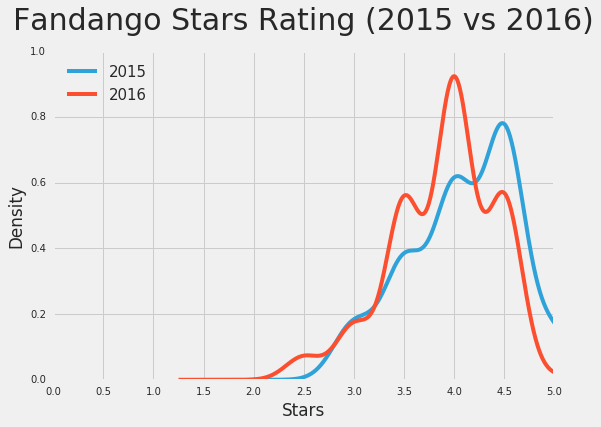

In [14]:
hickey_data['Fandango_Stars'].plot.kde(label = '2015', legend = True,
                                       figsize = (8,5.5))
post_article['fandango'].plot.kde(label = '2016', legend = True)
plt.legend(loc = 2, prop = {'size' : 15}) #Changes location and enlarges
plt.xlabel('Stars')
plt.title('Fandango Stars Rating (2015 vs 2016)', 
          y = 1.05, fontdict = {'fontsize' : 30}) #Shifts title up and enlarges
plt.xlim(0,5) #Range for x axis
plt.xticks(arange(0,5.1,.5)) #Intervals for the x axis ticks
plt.show()

### 2015
From this graph we see the obvious left skewed nature of the distribution, with no representation under 3.0, which is exactly what Hickey stated in his analysis. There is also a peak at 4.5, the data is truly bloated towards the higher end of the range.

### 2016
2016 shows somewhat of a fix, as the numbers aren't as dramatically skewed leftwards. There is also representation of movies under 3.0, so it seems like there have been improvements made. I still think there is some sort of alteration as there have to be some movies that were truly deserving of <2.0 scores. Maybe this was a lucky year?

### Frequency Tables
Let's generate some frequency tables to look at the raw numbers.

In [22]:
print('2015\n' + '-'*16 )
print(hickey_data['Fandango_Stars'].value_counts(normalize = True).sort_index()*100)

2015
----------------
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


In [23]:
print('2016\n' + '-'*16 )
print(post_article['fandango'].value_counts(normalize = True).sort_index()*100)

2016
----------------
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


I believe there is a dramatic change between the two years. 2015 had no representation below 3.0 (just like the graph displayed), and had >10X more movies rated 5.0 than 2016. The highest represented rating was 4.5, whereas in 2016 4.0 was the dominant rating. Overall as we transition from 2015 to 2016, the distribution is less skewed to the left and becomes a bit more averaged towards the middle of [0,5]

### Summary Statistics
For further precision, let's present some of the simple statistics to exemplify the difference between these two years of ratings.

In [41]:
mean_hickey = hickey_data['Fandango_Stars'].mean()
median_hickey = hickey_data['Fandango_Stars'].median()
mode_hickey = hickey_data['Fandango_Stars'].mode()[0] #Mode output is weird
print('2015 (Hickey Summary Statistics)\n'+ '-'*16)
print('Mean:', mean_hickey)
print('Median:', median_hickey)
print('Mode:', mode_hickey)

2015 (Hickey Summary Statistics)
----------------
Mean: 4.0852713178294575
Median: 4.0
Mode: 4.5


In [40]:
mean_post = post_article['fandango'].mean()
median_post = post_article['fandango'].median()
mode_post = post_article['fandango'].mode()[0]
print('2016 (Post-Article Summary Statistics)\n'+ '-'*16)
print('Mean:', mean_post)
print('Median:', median_post)
print('Mode:', mode_post)

2016 (Post-Article Summary Statistics)
----------------
Mean: 3.887434554973822
Median: 4.0
Mode: 4.0


In [36]:
summary = pd.DataFrame()
summary['2015'] = [mean_hickey,median_hickey,mode_hickey]
summary['2016'] = [mean_post,median_post,mode_post]
summary.index = ['Mean','Median','Mode']

In [39]:
summary

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


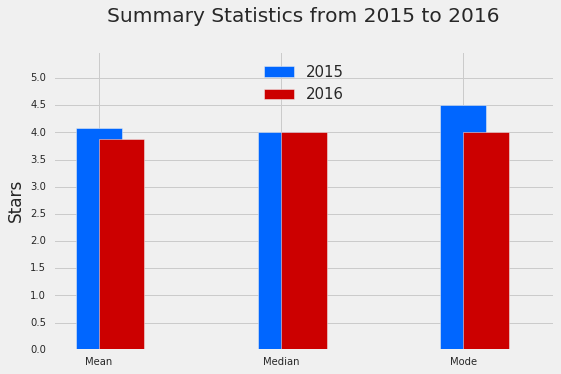

In [74]:
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))
plt.title('Summary Statistics from 2015 to 2016', y = 1.08)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(loc = 'upper center',framealpha = 0, prop = {'size' : 15})
plt.show()

This is actually a bit surprising, sort of means the tables aren't too different. The stark difference is in Mode, it's clear that 2015 was handing out higher stars than they did a year later. The mean is simply a reflection of that.

# Conclusion
Our analysis shows that Fandango may have amended their system slightly. Movie ratings, on average, were lower in 2016 compared to 2015. While this could just be a coincidence of having a year of simply worse movies, it could also mean that Fandango noticed Hickey's article and chose to fix their possibly tainted reputation. 